# Coding Exercise #3 *Laser amplifier with saturation*

In this exercise, you will simulate the growth of the intensity of a laser beam propagating through a laser amplifier in the presence of gain saturation.

In the lectures, we saw that a laser beam passing through a pumped gain medium (an *amplifier*) does not experience unbounded exponential growth.

As the beam becomes more intense, it decreases the population inversion through stimulated emission and the hence the gain is reduced.

The fact that the gain experienced by the beam depends on the beam intensity, and the intensity depends on the gain, we end up with the following nonlinear differential equation


## $\frac{dI\left(z\right)}{dz}=\gamma\left(I\left(z\right)\right)I\left(z\right)$

Here, the beam is propagating in the $z$ direction and $I\left(z\right)$, $\gamma\left(z\right)$ are the beam intensity and exponential gain coefficient at position $z$, respectively.

This differential equation cannot be solved analytically in the general case.


## A note about units

Provided we are consistent, it doesn't matter which units we use for intensity. To keep things general, we will use arbitrary units.

## Simulation Tasks


**a)** A laser amplifier of length $L=10$ cm has a small signal gain coefficient of $\gamma_0 = 1$ /cm (at a certain level of pumping) and a saturation intensity $I_{sat}=100$ (arb. units) 

A beam of $I_{in}=1$ is applied to the input of the amplifier. 

Use `odeint` from `scipy.integrate` to solve the differential equation above (see Coding Exercise 2 for some tips on `odeint`).

i) Using a log vertical scale, plot $I(z)$ and $I_{unsat}(z)$ as a function of $z$ in the amplifier, where $I_{unsat}(z) = I_{in}\exp(\gamma_0 z)$ represents the intensity growth of the beam in the absence of saturation. Record your observations.

Hints: you will need to define funcions for $\gamma(I)$ and for the LHS of the differential equation above.

 

In [1]:
from scipy.integrate import odeint
import numpy as np

I_in = 1
L = 10 # [cm]
I_sat = 100 # [arbitrary units]
gamma_0 = 1

def dIdx(I,z):
    return gamma(I)* I

def gamma(I):
    return gamma_0/ (1+ I/I_sat)

# Define independent variable distance z [cm]
z = np.linspace(0,10,100)
# Solve the 1st order differential equation
I = odeint(dIdx, I_in, z)

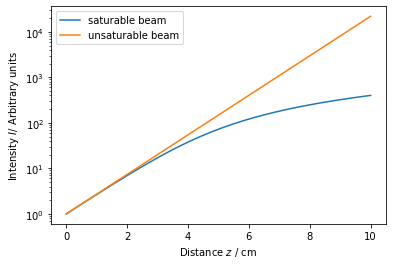

In [10]:
import matplotlib.pyplot as plt
plt.plot(z,I, label='saturable beam')
plt.xlabel('Distance $z$ / cm')
plt.ylabel('Intensity $I $/ Arbitrary units')


def I_unsat(z):
    return I_in*np.exp(gamma_0*z)

plt.plot(z, I_unsat(z), label='unsaturable beam')
plt.yscale('log')
plt.legend()

ii) Plot $\gamma$ and $\gamma_0$ as a function of z in the amplifier. Explain the behaviour at $z=0$. Record your observations.

Hint: remember $\gamma_0$ is a constant for a given amplifier at a given pumping rate.

**Answer**:
$\gamma < \gamma_0$ at $z=0$ according to the solution, which is a bit unexpected as it does not obey the strict initial condition.

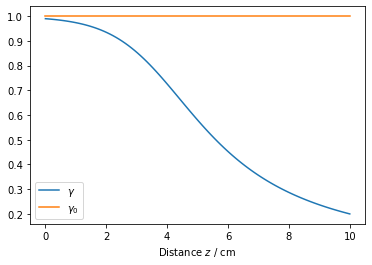

In [21]:
plt.plot(z, gamma(I), label='$\gamma$')
plt.plot(z, gamma_0 + z*0, label='$\gamma_0$')
plt.xlabel('Distance $z$ / cm')
plt.legend()

ii) Calculate the intensity at the output of the amplifier $I_{out}$; and the saturated, $G$,  and unsaturated gain, $G_0$.

In [25]:
G_0 = I_in*np.exp(gamma_0*L)
I_out = float(I[-1])
G = I_out/I_in

print(G_0, G)

22026.465794806718 401.4833811778504


iii) Check your answer for $I_{out}$ using the appropriate formula from Lecture 4.6.1

**Answer**: Agrees!

In [27]:

print(I_out/I_sat, G/(G-1) * np.log(G_0/G))

4.014833811778504 4.014833859424513


### Extension

**b)** Before doing any more simulations, think carefully about how the output intensity from an amplifier varies with input intensity over a large range of input intensties (from $I_{in}\ll I_{sat}$ to $I_{in}\gg I_{sat}$). Plot a sketch by hand to record your predictions.

**c)** Now carry out a simulation to test your prediction. Make a log-log plot of $I_{out}$ vs $I_{in}$ for $I_{in}$ in the range 1e-3 to 1e-5 (use `np.logspace`) for $\gamma_0=0.5$ /cm and $I_{sat}=100$. On the same axes, plot the extreme cases you thought about in the previous part. 

Were your predictions correct? If not, use the simulations to improve your understanding.

Hint: You can loop over your `Iin` array and calculate the output intensity $I(z=L)$ at each iteration. Alternatively, a more elegant approach is to pass the `Iin` array directly to `odeint` which will return a 2D array of $I(z)$ vs $I_{in}$. You will then need the extract the `Iout` array from this, corresponding to $I(z=L)$.